<a href="https://colab.research.google.com/github/niapollard/TEST/blob/main/Figure%205-Table%201_S4-S6%3A%20Varies%20Circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q numpy==1.23.5 jarvis-tools qiskit==0.43.1 qiskit_nature==0.6.2 pyscf qiskit-aer==0.12.0 pylatexenc

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 5.5 MB/s eta 0:00:00
 

Restart the session to succesfully run cells

In [ ]:
import numpy as np

# Importing Qiskit and Jarvis libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import Aer
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureDriverType,
    ElectronicStructureMoleculeDriver,
)
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.drivers.second_quantization import MethodType
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_nature.transformers.second_quantization.electronic.active_space_transformer import ActiveSpaceTransformer
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
import itertools, functools
from qiskit.opflow import I, X, Y, Z
from jarvis.db.figshare import get_wann_electron, get_wann_phonon, get_hk_tb
from jarvis.core.circuits import QuantumCircuitLibrary
from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
from pyscf import gto, scf, tools
from qiskit.visualization import circuit_drawer
from IPython.display import display

<ipython-input-6-536d5c0bc6be>:29: NatureDeprecationWarning: The qiskit_nature.algorithms.excited_state_solvers package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.algorithms.excited_state_solvers package.
  from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
<ipython-input-6-536d5c0bc6be>:29: NatureDeprecationWarning: The qiskit_nature.algorithms.pes_sampler package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release . Please refer to 'https://github.com/Qiskit/qiskit-nature/issues/750' for additional information regarding 'extrapolators'.
  from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver


In [ ]:
#Build the molecule
#molecule = Molecule(
#   geometry=[['Al',[14.46097199, -11.1250000, 0.00000000]],
#              ['Al',[17.61662800, -11.1250000, 0.00000000]]],
#    charge=0,
#    multiplicity=1)

#Build the molecule
molecule = Molecule(
    geometry=[['Al',[0,0, 0.00000000]]],
    charge=-1,
    multiplicity=1)

Al sto3g MethodType.RKS <qiskit.algorithms.optimizers.slsqp.SLSQP object at 0x7868ba72efb0> lda statevector_simulator 1 1


<ipython-input-8-42a8ecc46ca4>:98: NatureDeprecationWarning: The qiskit_nature.problems.second_quantization.electronic.ElectronicStructureProblem class is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.problems.ElectronicStructureProblem class.
  res1=get_qubit_op(molecule=molecule,basis=j,functional=o,method=k)
<ipython-input-8-42a8ecc46ca4>:17: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


Rendering Circuit 1 diagram with full details:


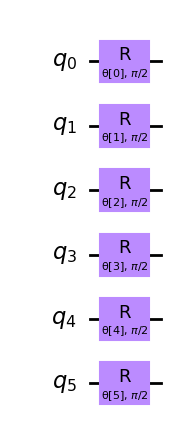

device statevector_simulator
seed 42


<ipython-input-8-42a8ecc46ca4>:59: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
<ipython-input-8-42a8ecc46ca4>:62: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


(5.34535345901e-07+0j)


<ipython-input-8-42a8ecc46ca4>:112: NatureDeprecationWarning: The qiskit_nature.algorithms.ground_state_solvers.GroundStateEigensolver class is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.algorithms.ground_state_solvers.GroundStateEigensolver class.
  solver =GroundStateEigensolver(res1['converter'], res['vqe'])


=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -506.138939980046
  - computed part:      -1.991519518223
  - ActiveSpaceTransformer extracted energy part: -504.147420461823
~ Nuclear repulsion energy (Hartree): 28.339891408341
> Total ground state energy (Hartree): -477.799048571704
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 3.000 S: 0.500 S^2: 0.750 M: 0.500
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [788.03242329  -546.60328153  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [757.72351093  -525.58009665  0.00000018]
    - computed part:      [90.92684508  -63.06962767  0.00000018]
    - ActiveSpaceTransformer extracted energy part: [666.79666586  -462.51046899  0.0]
  > Dipole moment (a.u.): [30.30891236  -21.02318488  -0.00000018]  Total: 36.88637242
                 (debye): [77.03756375  -53.43560093  -0.00000046]  Total: 93.75579808
 
Al sto3g MethodType.RKS <qiskit.algorithms.optimizers.slsqp.SLSQP object at 0x7868ba72efb0> 

<ipython-input-8-42a8ecc46ca4>:17: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


Rendering Circuit 2 diagram with full details:


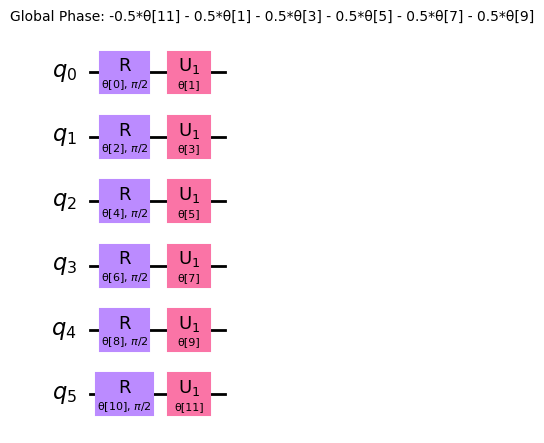

device statevector_simulator
seed 42


<ipython-input-8-42a8ecc46ca4>:59: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
<ipython-input-8-42a8ecc46ca4>:62: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


(1.30384524099e-07+0j)
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -506.138939645825
  - computed part:      -1.991519184002
  - ActiveSpaceTransformer extracted energy part: -504.147420461823
~ Nuclear repulsion energy (Hartree): 28.339891408341
> Total ground state energy (Hartree): -477.799048237483
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 3.000 S: 0.500 S^2: 0.750 M: -0.500
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [788.03242329  -546.60328153  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [757.72344759  -525.58005353  0.00000014]
    - computed part:      [90.92678173  -63.06958455  0.00000014]
    - ActiveSpaceTransformer extracted energy part: [666.79666586  -462.51046899  0.0]
  > Dipole moment (a.u.): [30.3089757  -21.023228  -0.00000014]  Total: 36.88644905
                 (debye): [77.03772475  -53.43571052  -0.00000035]  Total: 93.75599284
 
Al sto3g MethodType.RKS <qiskit.algorithms.optimizers.slsqp.SLSQP objec

<ipython-input-8-42a8ecc46ca4>:17: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


Rendering Circuit 3 diagram with full details:


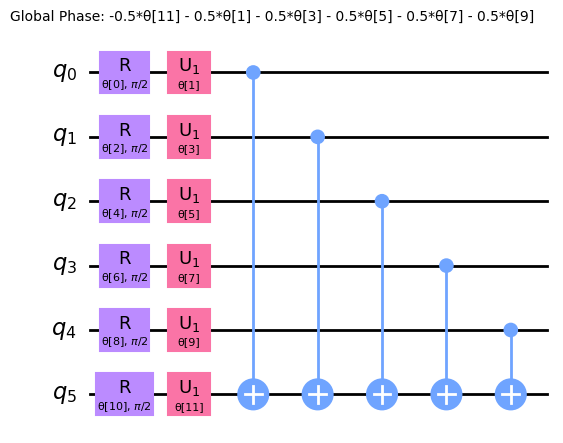

device statevector_simulator
seed 42


<ipython-input-8-42a8ecc46ca4>:59: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
<ipython-input-8-42a8ecc46ca4>:62: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


(9.3497447093e-08+0j)
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -506.13893273739
  - computed part:      -1.991512275567
  - ActiveSpaceTransformer extracted energy part: -504.147420461823
~ Nuclear repulsion energy (Hartree): 28.339891408341
> Total ground state energy (Hartree): -477.799041329048
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 3.000 S: 0.500 S^2: 0.750 M: -0.500
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [788.03242329  -546.60328153  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [757.7235061  -525.58088384  0.00074135]
    - computed part:      [90.92684024  -63.07041485  0.00074135]
    - ActiveSpaceTransformer extracted energy part: [666.79666586  -462.51046899  0.0]
  > Dipole moment (a.u.): [30.30891719  -21.02239769  -0.00074135]  Total: 36.88592776
                 (debye): [77.03757604  -53.43360009  -0.00188431]  Total: 93.75466785
 
Al sto3g MethodType.RKS <qiskit.algorithms.optimizers.slsqp.SLSQP objec

<ipython-input-8-42a8ecc46ca4>:17: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


Rendering Circuit 4 diagram with full details:


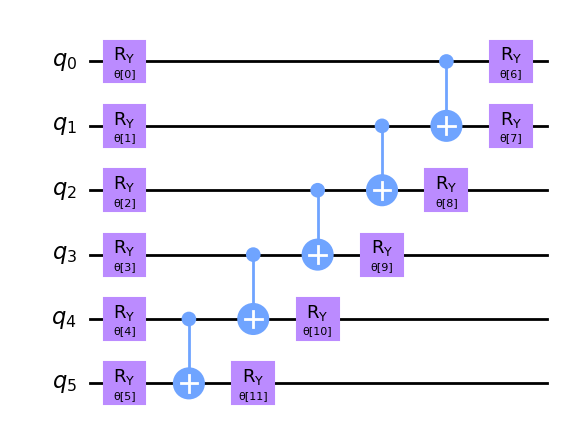

device statevector_simulator
seed 42


<ipython-input-8-42a8ecc46ca4>:59: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
<ipython-input-8-42a8ecc46ca4>:62: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


(4.96928520298e-07+0j)
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -506.138939577557
  - computed part:      -1.991519115735
  - ActiveSpaceTransformer extracted energy part: -504.147420461823
~ Nuclear repulsion energy (Hartree): 28.339891408341
> Total ground state energy (Hartree): -477.799048169216
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 3.000 S: 0.500 S^2: 0.750 M: 0.500
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [788.03242329  -546.60328153  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [757.72352855  -525.58038554  0.00015002]
    - computed part:      [90.92686269  -63.06991656  0.00015002]
    - ActiveSpaceTransformer extracted energy part: [666.79666586  -462.51046899  0.0]
  > Dipole moment (a.u.): [30.30889474  -21.02289599  -0.00015002]  Total: 36.8861933
                 (debye): [77.03751898  -53.43486664  -0.00038132]  Total: 93.7553428
 
Al sto3g MethodType.RKS <qiskit.algorithms.optimizers.slsqp.SLSQP objec

<ipython-input-8-42a8ecc46ca4>:17: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


Rendering Circuit 5 diagram with full details:


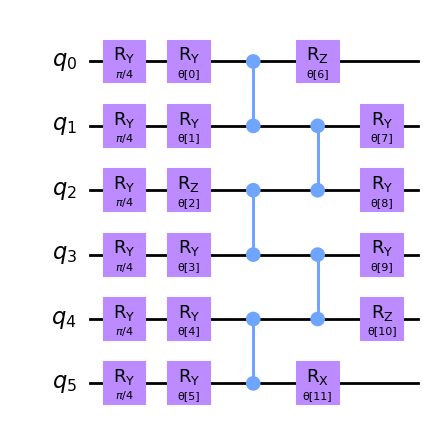

device statevector_simulator
seed 42


<ipython-input-8-42a8ecc46ca4>:59: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
<ipython-input-8-42a8ecc46ca4>:62: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


(0.4268680687289649+0j)
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -506.099772297529
  - computed part:      -1.952351835706
  - ActiveSpaceTransformer extracted energy part: -504.147420461823
~ Nuclear repulsion energy (Hartree): 28.339891408341
> Total ground state energy (Hartree): -477.759880889188
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 3.293 S: 0.500 S^2: 0.750 M: -0.354
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [788.03242329  -546.60328153  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [766.60071838  -531.68784421  0.00360782]
    - computed part:      [99.80405252  -69.17737522  0.00360782]
    - ActiveSpaceTransformer extracted energy part: [666.79666586  -462.51046899  0.0]
  > Dipole moment (a.u.): [21.43170491  -14.91543732  -0.00360782]  Total: 26.11107541
                 (debye): [54.47395519  -37.9112566  -0.00917017]  Total: 66.36772751
 
Al sto3g MethodType.RKS <qiskit.algorithms.optimizers.slsqp.SLSQP ob

<ipython-input-8-42a8ecc46ca4>:17: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


Rendering Circuit 6 diagram with full details:


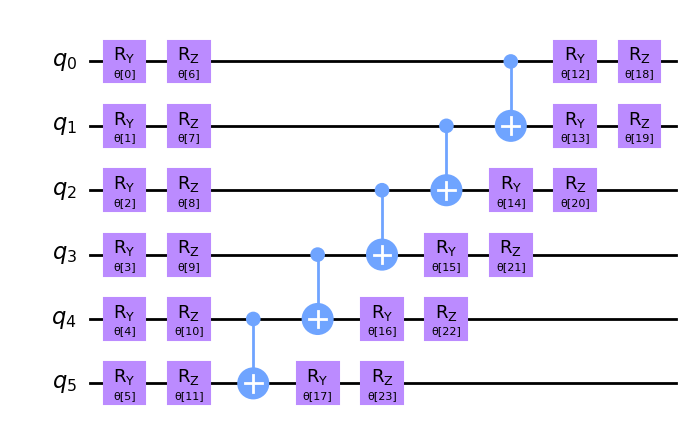

device statevector_simulator
seed 42


<ipython-input-8-42a8ecc46ca4>:59: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
<ipython-input-8-42a8ecc46ca4>:62: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


(8.5066017987e-08+0j)
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -506.138938515181
  - computed part:      -1.991518053358
  - ActiveSpaceTransformer extracted energy part: -504.147420461823
~ Nuclear repulsion energy (Hartree): 28.339891408341
> Total ground state energy (Hartree): -477.799047106839
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 3.000 S: 0.500 S^2: 0.750 M: 0.500
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [788.03242329  -546.60328153  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [757.72351812  -525.5803109  0.00127427]
    - computed part:      [90.92685226  -63.06984191  0.00127427]
    - ActiveSpaceTransformer extracted energy part: [666.79666586  -462.51046899  0.0]
  > Dipole moment (a.u.): [30.30890517  -21.02297063  -0.00127427]  Total: 36.88624444
                 (debye): [77.03754549  -53.43505638  -0.00323887]  Total: 93.75547278
 


In [ ]:
def get_qubit_op(
    molecule,
    basis='sto3g',
    functional='lda',
    method= MethodType.RKS,
    driver_type= ElectronicStructureDriverType.PYSCF,
    converter= JordanWignerMapper()):

  driver=ElectronicStructureMoleculeDriver(molecule, basis, method,driver_type)
  properties = driver.run()
  problem = ElectronicStructureProblem(driver)

  second_q_ops = problem.second_q_ops()
  second_q_ops = list(second_q_ops.values()) #list of second quantized operators
  hamiltonian=second_q_ops[0]

  numpy_solver = NumPyMinimumEigensolver()
  tmp = properties.get_property('ParticleNumber')
  alpha_occ=tmp.occupation_alpha
  beta_occ=tmp.occupation_beta

  mo_considered=3
  #active and inactive space has to be even, non-magnetic

  first_index = min(np.where(alpha_occ<1)[0][0],np.where(beta_occ<1)[0][0])

  orb_act = np.arange(first_index-mo_considered,first_index)+1

  transformer= ActiveSpaceTransformer(num_electrons=mo_considered+1, num_molecular_orbitals=len(orb_act), active_orbitals=orb_act)
  problem_reduced = ElectronicStructureProblem(driver, [transformer])
  second_q_ops_reduced = problem_reduced.second_q_ops()

  second_q_ops_reduced = list(second_q_ops_reduced.values())
  hamiltonian_reduced = second_q_ops_reduced[0]
  mapper = JordanWignerMapper()
  converter = QubitConverter(mapper=mapper)
  qubit_op = converter.convert(hamiltonian_reduced)

  res1={}
  res1['qubit_op']=qubit_op
  res1['converter']=converter
  res1['problem_reduced']=problem_reduced
  return res1 #qubit_op, converter, problem_reduced

def get_energy(optimizer='',device='',qubit_op='',seed='', reps=1, circuit_number=6):
  seed = 42
  counts = []
  values = []


  def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

  algorithm_globals.random_seed = seed
  print('device',device)
  print('seed',seed)

  qi = QuantumInstance(device, seed_transpiler=seed, seed_simulator=seed)
  n_qubits = qubit_op.num_qubits
  ansatz = QuantumCircuitLibrary(n_qubits=n_qubits, reps=reps).__getattribute__(f'circuit{circuit_number}')()
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)
  result = vqe.compute_minimum_eigenvalue(operator=qubit_op)


  eigenvalue = result.eigenvalue
  # return eigenvalue, vqe, qi

  res={}
  res['eigenvalue']=eigenvalue
  res['vqe']=vqe
  res['qi']=qi
  return res

elements=['Al']
basis=['sto3g']
method=[MethodType.RKS]
#driver_type=[]
optimizer=[SLSQP(maxiter=1000)]
#converter=[JordanWignerMapper()]
functionals=['lda']
devices=[Aer.get_backend('statevector_simulator')]
reps_list = [1]
circuit_number= [1,2,3,4,5,6]
mem={}
for i in elements:
  for j in basis:
    for k in method:
      #for l in driver_type:
        for m in optimizer:
          #for n in converter:
            for o in functionals:
              for p in devices:
                for reps in reps_list:
                  for circuit_number in circuit_number:
                   print(i,j,k,m,o,p,reps,circuit_number)

                   res1=get_qubit_op(molecule=molecule,basis=j,functional=o,method=k)

                   # Generate the ansatz from QuantumCircuitLibrary
                   ansatz = QuantumCircuitLibrary(n_qubits=res1['qubit_op'].num_qubits, reps=reps).__getattribute__(f'circuit{circuit_number}')()

                  # Decompose and display the detailed circuit diagram
                   decomposed_ansatz = ansatz.decompose()  # This will expand the circuit details
                   print(f"Rendering Circuit {circuit_number} diagram with full details:")
                   display(circuit_drawer(decomposed_ansatz, output='mpl'))  # Display as an image in Jupyter

                   res=get_energy(optimizer=m,device=p,qubit_op=res1['qubit_op'],seed=42, reps=reps, circuit_number=circuit_number)
                   print(res['eigenvalue'])

                   #GroundStateEigensolver
                   solver =GroundStateEigensolver(res1['converter'], res['vqe'])
                   result=solver.solve(res1['problem_reduced'])
                   print(result)

                   #numpy
                   print("Numpy Energy Result")
                   solver =GroundStateEigensolver(res1['converter'], res1['numpy_solver'])
                   result=solver.solve(res1['problem_reduced'])
                   print(result)

                   mem[i,j,k,m,o,p,reps,circuit_number]= {
                       'eigenvalue': res['eigenvalue'],
                       'vqe': res['vqe'],
                       'qi': res['qi'],
                       'converter': res1['converter'],
                       'problem_reduced': res1['problem_reduced']
                      }

#print(mem)